### **Описание датасета**

- **Предметная область:** Химический анализ красных вин и оценка их качества
- **Источник данных:** UCI Machine Learning Repository - реальные данные о винах Vinho Verde
- **Характер данных:** Реальные данные
- **Описание задачи:** Прогнозирование качества вина по химическим показателям

### **Описание атрибутов**

- **fixed acidity** - числовой - фиксированная кислотность (г/л винной кислоты)
- **volatile acidity** - числовой - летучая кислотность (г/л уксусной кислоты)
- **citric acid** - числовой - содержание лимонной кислоты (г/л)
- **residual sugar** - числовой - остаточный сахар (г/л)
- **chlorides** - числовой - содержание хлоридов (г/л хлорида натрия)
- **free sulfur dioxide** - числовой - свободный диоксид серы (мг/л)
- **total sulfur dioxide** - числовой - общий диоксид серы (мг/л)
- **density** - числовой - плотность (г/мл)
- **pH** - числовой - уровень кислотности
- **sulphates** - числовой - содержание сульфатов (г/л сульфата калия)
- **alcohol** - числовой - содержание алкоголя (% об.)
- **quality** - числовой - качество вина (шкала от 0 до 10)

### **Новый атрибут**
- **total acidity** - числовой - общая кислотность

### **Ход работы:**

#### **Импорт библиотек и загрузка датасета**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
from tabulate import tabulate
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10


path = "/Users/yulia/Desktop/вуз/winequality-red.csv"



with open(path, 'r') as f:
    first_lines = [f.readline().strip() for _ in range(5)]

print("Первые строки файла:")
for i, line in enumerate(first_lines):
    print(f"{i}: {line}")


first_line = first_lines[0]
df = pd.read_csv(path, sep=',')

print(tabulate(df.head(), headers='keys', tablefmt='grid', floatfmt=".2f"))


Первые строки файла:
0: fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1: 7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2: 7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5
3: 7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
4: 11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
+----+-----------------+--------------------+---------------+------------------+-------------+-----------------------+------------------------+-----------+------+-------------+-----------+-----------+
|    |   fixed acidity |   volatile acidity |   citric acid |   residual sugar |   chlorides |   free sulfur dioxide |   total sulfur dioxide |   density |   pH |   sulphates |   alcohol |   quality |
+====+=================+====================+===============+==================+=============+=======================+========================+===========+======+=============+===========+=====

### **Добавление нового атрибута - общей кислотности**
 **Общая кислотность** = фиксированная кислотность + летучая кислотность + лимонная кислота

In [22]:

df['total acidity'] = df['fixed acidity'] + df['volatile acidity'] + df['citric acid']


num_columns = len(df.columns)
split_index = num_columns // 2
print("Первые 5 строк :")
first_half = df.iloc[:, :split_index]
print(tabulate(first_half.head(), headers='keys', tablefmt='grid', floatfmt=".2f"))
print("\n\n")

second_half = df.iloc[:, split_index:]
print(tabulate(second_half.head(), headers='keys', tablefmt='grid', floatfmt=".2f"))

Первые 5 строк :
+----+-----------------+--------------------+---------------+------------------+-------------+-----------------------+------------------------+-----------+
|    |   fixed acidity |   volatile acidity |   citric acid |   residual sugar |   chlorides |   free sulfur dioxide |   total sulfur dioxide |   density |
+====+=================+====================+===============+==================+=============+=======================+========================+===========+
|  0 |            7.40 |               0.70 |          0.00 |             1.90 |        0.08 |                 11.00 |                  34.00 |      1.00 |
+----+-----------------+--------------------+---------------+------------------+-------------+-----------------------+------------------------+-----------+
|  1 |            7.80 |               0.88 |          0.00 |             2.60 |        0.10 |                 25.00 |                  67.00 |      1.00 |
+----+-----------------+--------------------+--

### **Поиск пропущенных значений**

In [39]:
stats_df = pd.DataFrame({'Среднее': df.mean(numeric_only=True), 'Среднеквадратичное отклонение': df.std(numeric_only=True),
                         'Количество пропусков': df.isnull().sum(), 'Процент пропусков': (df.isnull().sum() / len(df)) * 100})

print(tabulate(stats_df, headers='keys', tablefmt='grid', floatfmt=".2f"))


+----------------------+-----------+---------------------------------+------------------------+---------------------+
|                      |   Среднее |   Среднеквадратичное отклонение |   Количество пропусков |   Процент пропусков |
+======================+===========+=================================+========================+=====================+
| fixed acidity        |      8.32 |                            1.74 |                   0.00 |                0.00 |
+----------------------+-----------+---------------------------------+------------------------+---------------------+
| volatile acidity     |      0.53 |                            0.18 |                   0.00 |                0.00 |
+----------------------+-----------+---------------------------------+------------------------+---------------------+
| citric acid          |      0.27 |                            0.19 |                   0.00 |                0.00 |
+----------------------+-----------+--------------------


### **Анализ пропущенных значений**

Пропущенных значений в данных не обнаружено. Все записи полные и готовы для дальнейшего анализа.

Если бы пропуски были, то можно было бы применить следующие стратегии обработки:
- Менее 5% пропусков - удалить строки с пропусками
- 5-30% пропусков - использовать методы машинного обучения для импутации или заполнить медианой/средним
- Более 30% пропусков - рассмотреть удаление признака или создание индикаторной переменной

### **Обработка дубликатов и выбросов**

In [9]:
print(f"Количество дубликатов: {df.duplicated().sum()}")

df_cleaned = df.drop_duplicates()
print(f"Размер датасета после удаления дубликатов: {df_cleaned.shape}")

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

columns_to_clean = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'alcohol', 'total acidity']

original_size = len(df_cleaned)
for column in columns_to_clean:
    df_cleaned = remove_outliers_iqr(df_cleaned, column)

print(f"\nУдалено выбросов: {original_size - len(df_cleaned)}")
print(f"Размер датасета после обработки выбросов: {df_cleaned.shape}")

null_counts = df_cleaned.isnull().sum()
null_df = pd.DataFrame({'Атрибут': null_counts.index, 'Количество пропусков': null_counts.values})

print("\n\nПропущенные значения после очистки:")
print(tabulate(null_df, headers='keys', tablefmt='grid', showindex=False))

Количество дубликатов: 240
Размер датасета после удаления дубликатов: (1359, 13)

Удалено выбросов: 268
Размер датасета после обработки выбросов: (1091, 13)


Пропущенные значения после очистки:
+----------------------+------------------------+
| Атрибут              |   Количество пропусков |
+======================+========================+
| fixed acidity        |                      0 |
+----------------------+------------------------+
| volatile acidity     |                      0 |
+----------------------+------------------------+
| citric acid          |                      0 |
+----------------------+------------------------+
| residual sugar       |                      0 |
+----------------------+------------------------+
| chlorides            |                      0 |
+----------------------+------------------------+
| free sulfur dioxide  |                      0 |
+----------------------+------------------------+
| total sulfur dioxide |                      0 |
+----

### **Построение графиков зависимостей с кластеризацией:**
- График 1: Алкоголь vs Качество
- График 2: Летучая кислотность vs Общая кислотность
- График 3: Плотность vs Остаточный сахар
- График 4: pH vs Общая кислотность

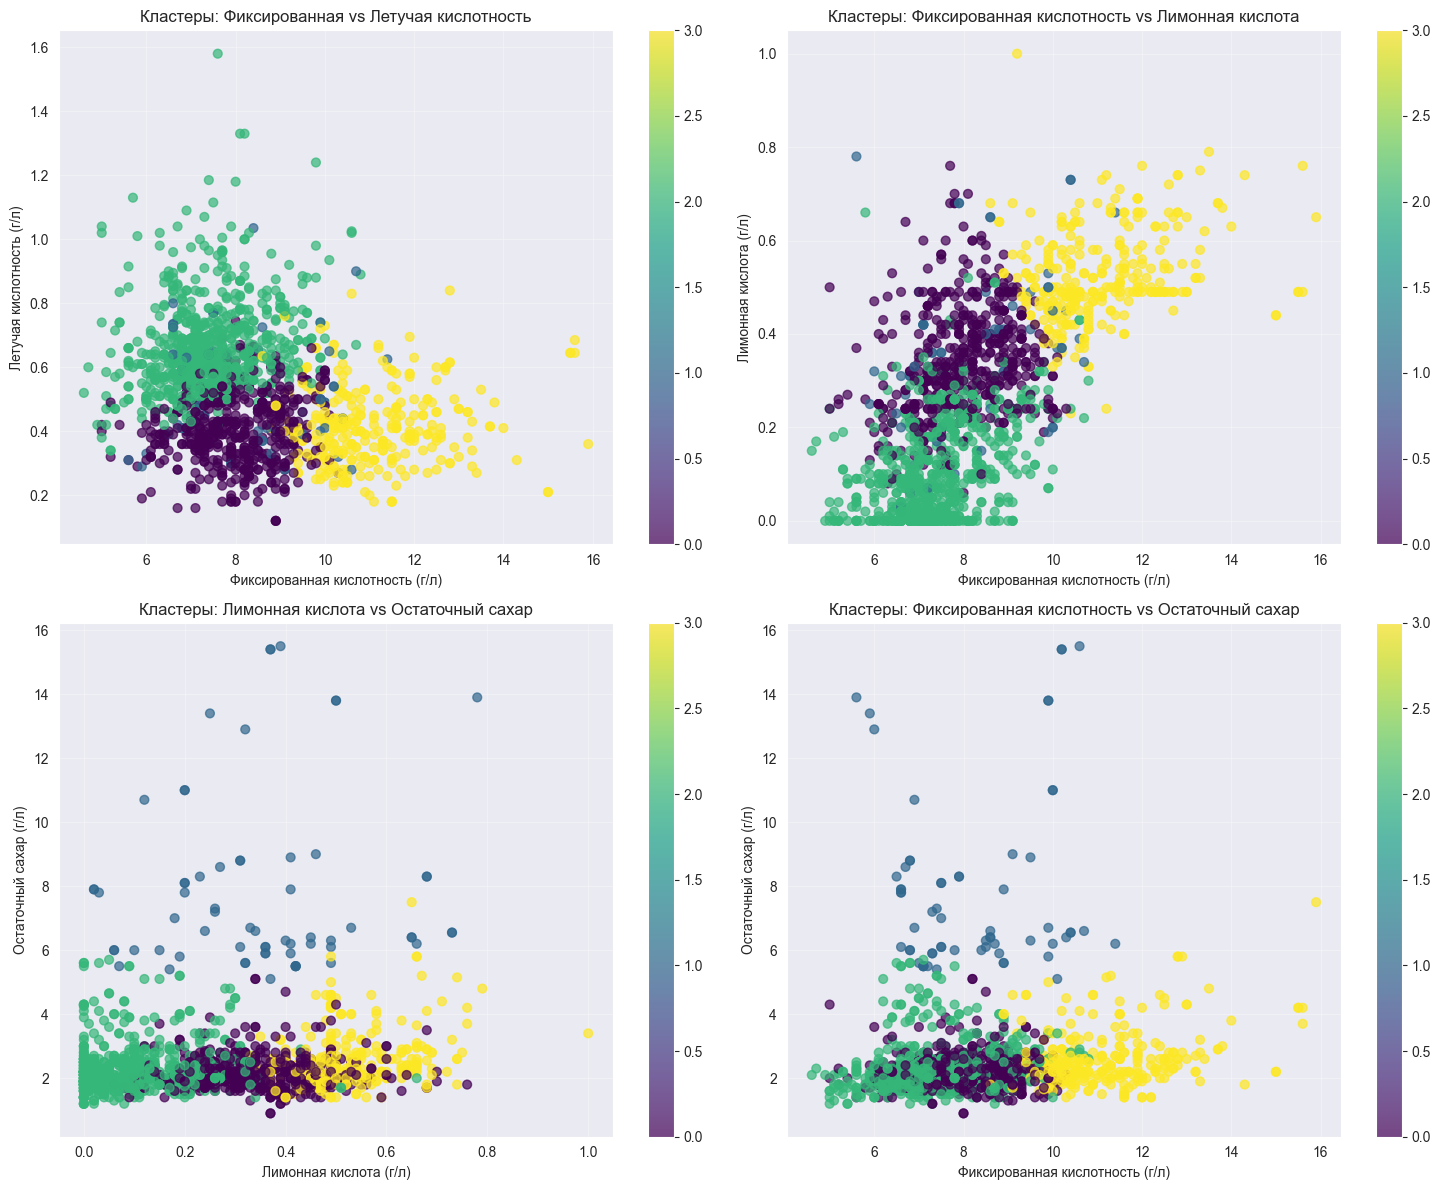

In [16]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df_clustered = df.copy()
df_clustered['Cluster'] = clusters[:len(df_clustered)]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

scatter1 = axes[0,0].scatter(df_clustered['fixed acidity'], df_clustered['volatile acidity'],
                            c=df_clustered['Cluster'], cmap='viridis', alpha=0.7, s=40)
axes[0,0].set_xlabel('Фиксированная кислотность (г/л)')
axes[0,0].set_ylabel('Летучая кислотность (г/л)')
axes[0,0].set_title('Кластеры: Фиксированная vs Летучая кислотность')
axes[0,0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0,0])

scatter2 = axes[0,1].scatter(df_clustered['fixed acidity'], df_clustered['citric acid'],
                            c=df_clustered['Cluster'], cmap='viridis', alpha=0.7, s=40)
axes[0,1].set_xlabel('Фиксированная кислотность (г/л)')
axes[0,1].set_ylabel('Лимонная кислота (г/л)')
axes[0,1].set_title('Кластеры: Фиксированная кислотность vs Лимонная кислота')
axes[0,1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[0,1])

scatter3 = axes[1,0].scatter(df_clustered['citric acid'], df_clustered['residual sugar'],
                            c=df_clustered['Cluster'], cmap='viridis', alpha=0.7, s=40)
axes[1,0].set_xlabel('Лимонная кислота (г/л)')
axes[1,0].set_ylabel('Остаточный сахар (г/л)')
axes[1,0].set_title('Кластеры: Лимонная кислота vs Остаточный сахар')
axes[1,0].grid(True, alpha=0.3)
plt.colorbar(scatter3, ax=axes[1,0])

scatter4 = axes[1,1].scatter(df_clustered['fixed acidity'], df_clustered['residual sugar'],
                            c=df_clustered['Cluster'], cmap='viridis', alpha=0.7, s=40)
axes[1,1].set_xlabel('Фиксированная кислотность (г/л)')
axes[1,1].set_ylabel('Остаточный сахар (г/л)')
axes[1,1].set_title('Кластеры: Фиксированная кислотность vs Остаточный сахар')
axes[1,1].grid(True, alpha=0.3)
plt.colorbar(scatter4, ax=axes[1,1])

plt.tight_layout()
plt.show()

### **Анализ кластеров**

In [17]:
for cluster_id in sorted(df_clustered['Cluster'].unique()):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    fixed_acidity = cluster_data['fixed acidity'].mean()
    volatile_acidity = cluster_data['volatile acidity'].mean()
    citric_acid = cluster_data['citric acid'].mean()
    residual_sugar = cluster_data['residual sugar'].mean()

    print(f"\nКластер {cluster_id + 1} ({len(cluster_data)} вин):")
    print(f"  Средняя фиксированная кислотность: {fixed_acidity:.1f} г/л")
    print(f"  Средняя летучая кислотность: {volatile_acidity:.2f} г/л")
    print(f"  Среднее содержание лимонной кислоты: {citric_acid:.2f} г/л")
    print(f"  Средний остаточный сахар: {residual_sugar:.1f} г/л")


Кластер 1 (509 вин):
  Средняя фиксированная кислотность: 8.0 г/л
  Средняя летучая кислотность: 0.40 г/л
  Среднее содержание лимонной кислоты: 0.35 г/л
  Средний остаточный сахар: 2.2 г/л

Кластер 2 (65 вин):
  Средняя фиксированная кислотность: 8.2 г/л
  Средняя летучая кислотность: 0.52 г/л
  Среднее содержание лимонной кислоты: 0.35 г/л
  Средний остаточный сахар: 7.8 г/л

Кластер 3 (724 вин):
  Средняя фиксированная кислотность: 7.4 г/л
  Средняя летучая кислотность: 0.66 г/л
  Среднее содержание лимонной кислоты: 0.11 г/л
  Средний остаточный сахар: 2.3 г/л

Кластер 4 (301 вин):
  Средняя фиксированная кислотность: 11.1 г/л
  Средняя летучая кислотность: 0.42 г/л
  Среднее содержание лимонной кислоты: 0.52 г/л
  Средний остаточный сахар: 2.6 г/л


### **Метод KMeans**

#### **Метод KMeans для датасета вин по 4 ключевым химическим параметрам**

Использует процесс: масштабирование -> метод локтя для базовых признаков -> кластеризация с базовыми признаками.

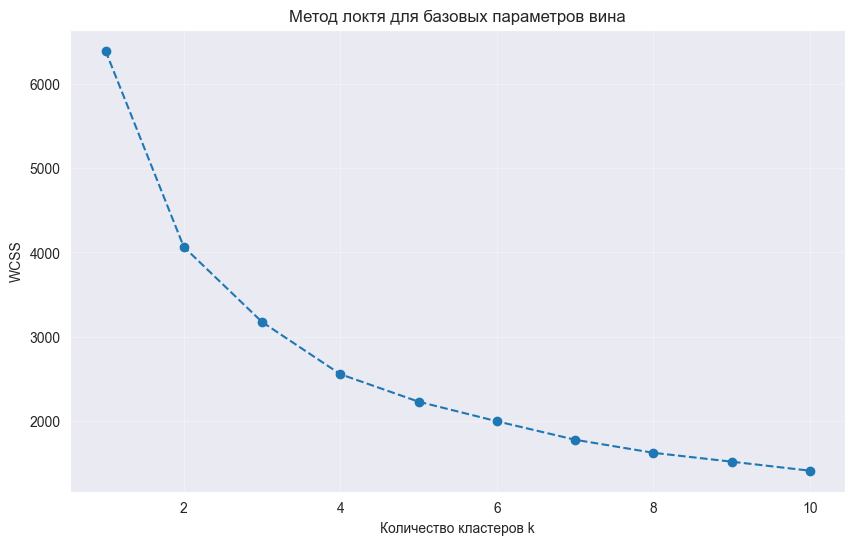

In [18]:
features_basic = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']

X_basic = df[features_basic].dropna()

scaler_basic = StandardScaler()
X_basic_scaled = scaler_basic.fit_transform(X_basic)

wcss_basic = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_basic_scaled)
    wcss_basic.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_basic, marker='o', linestyle='--')
plt.xlabel('Количество кластеров k')
plt.ylabel('WCSS')
plt.title('Метод локтя для базовых параметров вина')
plt.grid(True, alpha=0.3)
plt.show()

k_optimal_basic = 4
kmeans_basic = KMeans(n_clusters=k_optimal_basic, random_state=42, n_init=10)
clusters_basic = kmeans_basic.fit_predict(X_basic_scaled)

df['Cluster_Basic'] = clusters_basic

 ### **Распределение датасета по 4 кластерам**

In [19]:
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_scaled)

df['Cluster'] = np.nan
df.loc[X.index, 'Cluster'] = clusters

print(f"Число кластеров: 4")
print("\nРаспределение по кластерам:")
print(df['Cluster'].value_counts().sort_index())

Число кластеров: 4

Распределение по кластерам:
Cluster
0.0    509
1.0     65
2.0    724
3.0    301
Name: count, dtype: int64


In [20]:
len(kmeans.labels_)
df['cluster'] = kmeans.labels_
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total acidity,Cluster_Basic,Cluster,cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,8.10,2,2.0,4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,8.68,2,2.0,9
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,8.60,2,2.0,9
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,12.04,3,3.0,7
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,8.10,2,2.0,4


### **Распределение вин по химическим кластерам**

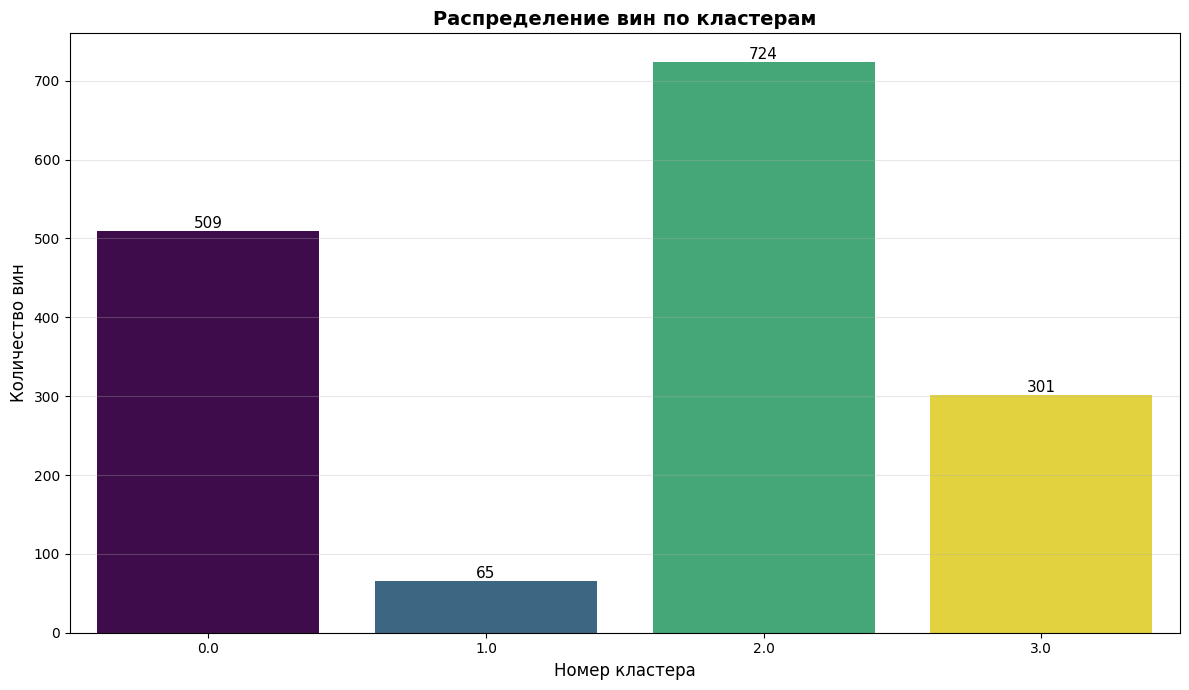

In [21]:
plt.style.use('default')

plt.figure(figsize=(12, 7))
cluster_counts = df['Cluster'].value_counts().sort_index()

axis = sns.barplot(x=cluster_counts.index, y=cluster_counts.values,
                   hue=cluster_counts.index, palette='viridis', legend=False)

axis.set_xlabel("Номер кластера", fontsize=12)
axis.set_ylabel("Количество вин", fontsize=12)  # Изменил на "вин"
axis.set_title("Распределение вин по кластерам", fontsize=14, fontweight='bold')  # Изменил заголовок

for i, value in enumerate(cluster_counts.values):
    axis.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=11)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### **Анализ данных:**

Данная работа с датасетом характеристик вина позволила проанализировать химические свойства вин за продолжительный период. Была проведена предобработка данных, включая обработку пропущенных значений и стандартизацию признаков.

Также была построена матрица визуализации взаимосвязей между ключевыми параметрами вина: кислотностью (фиксированной, летучей, лимонной), остаточным сахаром, алкоголем и другими химическими показателями.

В работе был применен метод KMeans для кластеризации вин по их химическому составу, что позволило выделить 4 характерных типа вин. С помощью метода локтя было определено оптимальное количество кластеров, обеспечивающее содержательное разделение данных.

Визуализация распределения вин по кластерам наглядно продемонстрировала частотность различных типов винных профилей, что позволяет выделить доминирующие стили вин и редкие комбинации характеристик.

Ключевые выводы для винного датасета:
- Кластеризация выявила естественные группы вин со схожими химическими профилями
- 4 кластера представляют основные типы вин по балансу кислотности, сахара и алкоголя
- Распределение по кластерам показывает преобладающие стили вин в датасете
- Результаты могут быть использованы для классификации новых вин и понимания рынка винной продукции